Josh Warren

# Project \#2 Starter Code
Your project should address the categories below. 

## Problem:
Given a large data set of positive and negative movie reviews, I am attempting to create machine learning algorithms that can learn if a review is negative or positive based on the diction used.



# Input Pipeline (sklearn):

In [1]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/IMDB_dataset.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Exploration:
- Number of samples
- Number of classes of the target variable
- Number of words per sample
- Distribution of sample length
- Something else: get creative :) 

The following print statements and histogram allow viewers to have a better understanding of what the data looks like at a surface level.

The shape of the data is: (50000, 2)
There are 25000 negative reviews in this data set
There are 25000 positive reviews in this data set
The median word count of any given review is 15.0
The mean word count of any given reviews is 47.75549188156638


Text(0, 0.5, 'Reviews')

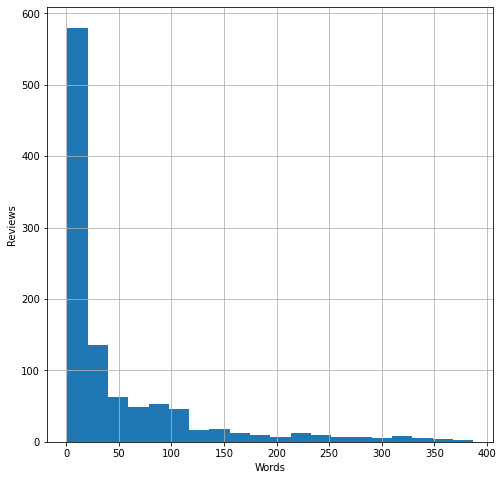

In [2]:
## Use cells here to explore the data:
import pylab as pl
print("The shape of the data is:",data.shape)

pos = data[data['sentiment'] == 'negative']
print("There are",pos.shape[0], "negative reviews in this data set")

pos = data[data['sentiment'] == 'positive']
print("There are",pos.shape[0], "positive reviews in this data set")

count = data['review'].str.split().apply(len).value_counts()
print("The median word count of any given review is",count.median())

print("The mean word count of any given reviews is",count.mean())

count.hist(figsize=[8,8],bins=20)
pl.xlabel("Words")
pl.ylabel("Reviews")

## Data Preparation

I'm providing you with code that cleans the reviews by making it all lowercase letters and removing stop words. The three cells below do this for you. I still want you to explain what you did with the data here. 

The nltk downloader allows you to work through the data and manipulate it the best you can for your needs. Stopwords allow the data to ignore commonly used words like "a" and "the".

In [3]:
from bs4 import BeautifulSoup
import re
import nltk
#only do next line once
nltk.download() #in Corpora tab, download stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#The NLTK downloader will open, you need to select (d) for Download, and then 'stopwords'then (q) to quit

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> q

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
#This is a function that takes in a review, makes sure it is only lower case letters and removes stopwords.
#It returns the cleaned review text.
def clean_review(review):
    #input is a string review
    #return is review cleaned of all punctuation, lowercase, and removed nltk stopwords
    letters_only = re.sub("[^a-zA-Z]"," ",review)
    lower_case = letters_only.lower()
    words = lower_case.split()
    for stop_word in stopwords.words("english"):
        while stop_word in words:
            words.remove(stop_word)
    cleaned = " ".join(words)
    return cleaned

The block of code above allows all letters to be lowercased so the algorithms will be reading from a uniform data set. It also returns that cleaned data set, allowing it to be used for the rest of the code.


Below, it is physically taking that cleaned data and assigning it to the array cleaned_text. This is done through a for loop.

In [5]:
#process the data
cleaned_text = []
for i in range(len(data)):
    cleaned_text.append(clean_review(data["review"][i]))  

In [6]:
cleaned_text[:5]

['one reviewers mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away br br would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches du

In [7]:
#establish training and testing dataset
train_data, test_data, train_sln, test_sln = \
    train_test_split(cleaned_text, data['sentiment'], test_size = 0.2, random_state=0) 

## Metrics
Becasue this is a classification, accuracy is the best way to measure the performance of our algorithm. 

**Model Planning**

For this classification, I will be using Support Vector Classifier, Perceptron, and a Multilayer Perceptron for studying the data. I will also be running a Principal Componenet Analysis on one of the listed models above to see just how accurate I can create my best algorithm.

For the Support Vector Classifier, I plan on tuning the random_state to randomize the data, and turning the kernal to linear to seperate the data.

For the Perceptron model, I am going to tune the random state once again, and will also be changing the alpha to .0002 so the constant can be multiplies the regularization term by double the normal amount.

For the MLP classifier, I will be tuning the random state to randomize the data, the hidden layer sizes to 100 to ensure there are 100 neurons in the ith layer, and the max iteration to 400, effectively doubling the number of iterations the data could possibly do. 

### Vectorizing the data

**CountVectorizer**: Convert a collection of text documents to a matrix of token counts

In [8]:
from sklearn.feature_extraction.text import CountVectorizer 

#Bag of Words with 5000 most common words
vectorizer = CountVectorizer(analyzer='word', max_features = 400)
#find the right 5000 words
vectorizer.fit(train_data)

#use the vectorizer to transform review strings into word count vectors 
train_data_vectors = vectorizer.transform(train_data).toarray()
test_data_vectors = vectorizer.transform(test_data).toarray()

**Support Vector Classifier**

For this algorithm, I decided it would be the best to tune

In [9]:
## Now use train_data_vectors and test_data_vectors to train/test/tune your sklearn models.
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score

clf = SVC(random_state= 41, kernel='linear')
clf.fit(train_data_vectors,train_sln)
predictions = clf.predict(test_data_vectors)
print('Accuracy:',accuracy_score(test_sln,predictions))

#vals = data[target].unique()
#CM1 = metrics.confusion_matrix(test_sln, predictions, labels=vals)
#print(pd.DataFrame(CM1, index = "True " + vals, columns = "Predicted " + vals))

Accuracy: 0.8261


**Perceptron Model**

For the Perceptron model I decided to tune the

In [10]:
from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings("ignore")

perc = Perceptron(random_state= 40, alpha= .0002)
perc.fit(train_data_vectors,train_sln)
diagnosis_perc = perc.predict(test_data_vectors)

print("Accuracy:", metrics.accuracy_score(test_sln, diagnosis_perc))
#vals = data[target].unique()
#CM3 = metrics.confusion_matrix(test_sln, diagnosis_perc, labels=vals)
#print(pd.DataFrame(CM3, index = "True " + vals, columns = "Predicted " + vals))

Accuracy: 0.7748


**Multi-layered Perceptron**

For the MLP algorithm the best results came from tuning

In [11]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=41,hidden_layer_sizes = (100,), max_iter = 800)
mlp.fit(train_data_vectors,train_sln)
predictions = mlp.predict(test_data_vectors)

print("Accuracy: ", metrics.accuracy_score(test_sln,predictions))

Accuracy:  0.7969


**Principal Component Analysis**

For the PCA algorithm, I decided that tuning the

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


extractor = PCA(n_components= 2, whiten=True)
extractor.fit(train_data_vectors)
train_data_transformed = extractor.transform(train_data_vectors)
test_data_transformed = extractor.transform(test_data_vectors)

clf2 = SVC(random_state= 41, kernel='linear')
clf2.fit(train_data_vectors,train_sln)
predictions = clf2.predict(test_data_vectors)
print('Accuracy:',accuracy_score(test_sln,predictions))

#vals = data[target].unique()
#CM7 = metrics.confusion_matrix(test_sln, data_sgd_predictions3, labels=vals)
#print(pd.DataFrame(CM7, index = "True " + vals, columns = "Predicted " + vals))

#tdf = pd.DataFrame(train_data_transformed) 
#tdf['diagnosis'] = pd.Series(list(train_sln))
#p_series = tdf[ tdf['Positive'] == 'P' ]
#n_series = tdf[ tdf['Negative'] == 'N' ]

#print(m_series)

#plt.plot(m_series[0],m_series[1],'ro',label='')
#plt.plot(b_series[0],b_series[1],'g^',label='Benign')
#plt.legend(loc='best')
#plt.show()

NameError: ignored

**Bumps in the road**

I was not anticipating this code would take such a gruesomely long time to run. Once I learned how much time it took to run through this dataset I quickly determined I would have to sit down early in order to handle this dataset. I then realized that I could just go through 400-600 words and get nearly the same result so I started using 400 words to speed up the process and allow for better testing of variables.

Figuring out which parameters to tune and what would be the best for the accuracy of the models was also tough. There are so many different options for tuning that you could probably create an extremely accurate model if you sat and toyed with it long enough. Or if you had a computer that was more high-powered than mine was during this project.